In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
rng = np.random.default_rng()
# numpy suggests using instances of their Generator class to obtain random values
# we can pass a seed otherwise it generates a random seed required for the random generation.

1. Function to generate the data matrix x

In [ ]:
def gen_x(numSamples, numFeatures):
    x = np.ones((numSamples, 1)) # making the first column of x as ones so that the bias term can be absorbed
    for i in range(numFeatures): # running a for loop to make sure that the distributions used to sample the columns are independent
        x = np.concatenate((x, rng.normal(size=(numSamples, 1))), axis=1) # adding columns containing samples from a normal distribution to x
    return x # returning the data matrix

In [ ]:
# Unit testing
print("Testing the gen_x function:\n")
x = gen_x(10, 4)
print("numSamples = 10, numFeatures = 4\n")
print(f"generated data matrix:\nx =\n{x}")

Testing the gen_x function:

numSamples = 10, numFeatures = 4

generated data matrix:
x =
[[ 1.          0.36553277 -0.12128362 -0.11650994 -0.5459443 ]
 [ 1.         -0.17602256 -0.63301698  0.69040062  0.15548021]
 [ 1.          1.23949658 -1.46312833 -1.22202305  0.87408834]
 [ 1.          0.29496991 -0.54720688  0.37734954  1.59833338]
 [ 1.         -1.04704628 -0.58803841  0.20059263 -0.50929784]
 [ 1.         -0.65177518 -0.27129228  1.00090757 -0.80618609]
 [ 1.          1.47924492 -0.0386852  -0.45524878  0.15874133]
 [ 1.          0.11161266  0.42021444 -0.62789202 -1.94221923]
 [ 1.         -0.8859664   0.82725307 -0.67715375 -0.54547226]
 [ 1.         -0.06664003  0.36311608 -1.02531438 -0.33782615]]


2. Function to generate the dependent variable column t

In [ ]:
def gen_t(x, w, bias, noise_var):
    w = np.concatenate((np.array(bias).reshape((1,1)), w)) # adding the bias term to w vector to match the dimensions with x
    return x @ w + rng.normal(scale=np.sqrt(noise_var), size=(x.shape[0], 1)) # returnong t with some noise added above the matrix product of x and w

In [ ]:
# Unit testing
print("Testing the gen_t function:\n")
bias = rng.random()
noise_var = rng.random()
w = rng.random(size=(4, 1))
print("randomly generated the following:")
print(f"bias = {bias}\nnoise variance = {noise_var}")
print(f"w =\n{w}")
t = gen_t(x, w, bias, noise_var)
print(f"\ngenerated dependent variable column:\nt =\n{t}")

Testing the gen_t function:

randomly generated the following:
bias = 0.99394949218102
noise variance = 0.6803726986086343
w =
[[0.31572864]
 [0.0232816 ]
 [0.66594997]
 [0.96095249]]

generated dependent variable column:
t =
[[ 1.31333564]
 [ 0.54517776]
 [ 1.42382177]
 [ 1.7747378 ]
 [-0.20540748]
 [ 1.55693273]
 [ 1.20784265]
 [-1.7988205 ]
 [ 1.24456522]
 [-0.82252954]]


3. Funtion to compute a linear regression estimate

In [ ]:
def lre(x, w):
    w = w.reshape(x.shape[1], 1) # reshaping the weight vector to the required dimensions
    y = x @ w # assuming both x and w have the bias term absorbed inside them, the linear regression estimate is just a single matrix multiplication
    return y # returning y as a column vector

In [ ]:
# Unit testing
print("Testing the lre function:\n")
w = rng.random(size = 5)
print(f"randomly generated the weight vector:\nw = {w}\n")
y = lre(x, w)
print(f"generated linear regression estimate:\ny =\n{y}")

Testing the lre function:

randomly generated the weight vector:
w = [0.1273875  0.49841626 0.04178982 0.3167613  0.48019239]

generated linear regression estimate:
y =
[[ 0.00544242]
 [ 0.30655394]
 [ 0.71666985]
 [ 1.13857488]
 [-0.60007237]
 [-0.27888075]
 [ 0.79507175]
 [-0.93095303]
 [-0.75604953]
 [-0.37765387]]


4. Function to compute Mean Squared Error

In [ ]:
def compute_mse(y, t):
    return np.mean((y - t) ** 2) # returning the mse which is nothing but the mean{squared[error]}.

In [ ]:
# Unit testing
print("Testing the compute_mse function:\n")
print("computing the mse between the linear regression estimate y, and dependent variable column t; both of which were generated earlier\n")
mse = compute_mse(y, t)
print(f"computed mse = {mse}")

Testing the compute_mse function:

computing the mse between the linear regression estimate y, and dependent variable column t; both of which were generated earlier

computed mse = 1.132221213637284


5. Function to compute the weights using pseudo inverse

In [ ]:
def weight_estimate(x, t, lambda2):
    xt = np.transpose(x) # computing the transpose of the data matrix x
    w = np.linalg.inv(lambda2*np.identity(x.shape[1]) + xt @ x) @ xt @ t # computing the weight vector using the analytical formula
    y = lre(x, w) # computing the linear regression estimate using this weight vector
    return w, compute_mse(y, t), y # returning the weight vector, the mse computed between the lre and the target, and lre

In [ ]:
# Unit testing
print("Testing the weight_estimate function:\n")
lambda2 = rng.random()
print(f"randomly generated lambda2 = {lambda2}")
print("computing the weight estimate using the x and t as generated earlier\n")
w, mse, y = weight_estimate(x, t, lambda2)
print(f"estimated weight vector :\nw =\n{w}\n\nlinear regression estimate:\ny =\n{y}\n\ncomputed mean squared error = {mse}")

Testing the weight_estimate function:

randomly generated lambda2 = 0.03915702413811961
computing the weight estimate using the x and t as generated earlier

estimated weight vector :
w =
[[0.91484065]
 [0.21543658]
 [0.24224083]
 [0.5748027 ]
 [0.80208463]]

linear regression estimate:
y =
[[ 0.45934617]
 [ 1.24512882]
 [ 0.82611482]
 [ 2.34473229]
 [ 0.25362288]
 [ 0.63740126]
 [ 1.08979874]
 [-0.87805903]
 [ 0.09762083]
 [ 0.12812686]]

computed mean squared error = 0.6038588884989182


6. Function to compute the gradient of mse w.r.t the weight vector

In [ ]:
def gradient_mse(x, t, w):
    me = 2 * (lre(x, w) - t) / x.shape[0] # computing the first vector required for finding the gradient
    diffi = me * x # generating the gradient matrix
    diff = np.sum(diffi, axis=0) # summing across one dimension to get the actual gradient
    return diff.reshape(w.shape) #returing the computed gradient as a column vector

In [ ]:
# Unit testing
print("Testing the gradient_mse function:\n")
print("computing the gradient using the x, t, and w from earlier\n")
dmse_dw = gradient_mse(x, t, w)
print(f"computed gradient_mse =\n{dmse_dw}")

Testing the gradient_mse function:

computing the gradient using the x, t, and w from earlier

computed gradient_mse =
[[-0.00716449]
 [-0.00168717]
 [-0.00189709]
 [-0.00450151]
 [-0.00628145]]


7. Function to compute the L2 norm of the weight vector, excluding the bias

In [ ]:
def L2norm(w):
    return np.sum(w[1:] ** 2) # returning the squared sum of the weights starting from index 1 since w[0] is the bias term

In [ ]:
# Unit testing
print("Testing the L2norm function:\n")
print("computing the L2 norm of the weight vector which was analytically calculated earlier\n")
l2 = L2norm(w)
print(f"computed L2 norm = {l2}")

Testing the L2norm function:

computing the L2 norm of the weight vector which was analytically calculated earlier

computed L2 norm = 1.0788314388234312


8. Function to compute the gradient of the L2 norm w.r.t the weight vector

In [ ]:
def gradient_L2(w):
    diff = 2 * w # computing the gradient
    diff[0] = 0 # setting the gradient w.r.t the bias term as 0
    return diff # returning the computed gradient

In [ ]:
# Unit testing
print("Testing the gradient_L2 function\n")
print("computing the gradient of the L2 norm w.r.t the weight vector which was analytically calculated earlier\n")
dl2_dw = gradient_L2(w)
print(f"computed gradient_L2 =\n{dl2_dw}")

Testing the gradient_L2 function

computing the gradient of the L2 norm w.r.t the weight vector which was analytically calculated earlier

computed gradient_L2 =
[[0.        ]
 [0.43087317]
 [0.48448166]
 [1.1496054 ]
 [1.60416926]]


9. Function to compute the L1 norm of the weight vector, excluding the bias

In [ ]:
def L1norm(w):
    return np.sum(np.abs(w[1:])) # returning the sum of the absolute values of the weights starting from index 1 since w[0] is the bias term

In [ ]:
# Unit testing
print("Testing the L1norm function:\n")
print("computing the L1 norm of the weight vector which was analytically calculated earlier\n")
l1 = L1norm(w)
print(f"computed L1 norm = {l1}")

Testing the L1norm function:

computing the L1 norm of the weight vector which was analytically calculated earlier

computed L1 norm = 1.834564743015116


10. Function to compute the gradient of the L1 norm w.r.t the weight vector

In [ ]:
def gradient_L1(w):
    diff = np.sign(w) # computing the gradient
    diff[0] = 0 # setting the gradient w.r.t the bias term as 0
    return diff # returning the computed gradient

In [ ]:
# Unit testing
print("Testing the gradient_L1 function\n")
print("computing the gradient of the L1 norm w.r.t the weight vector which was analytically calculated earlier\n")
dl1_dw = gradient_L1(w)
print(f"computed gradient_L1 =\n{dl1_dw}")

Testing the gradient_L1 function

computing the gradient of the L1 norm w.r.t the weight vector which was analytically calculated earlier

computed gradient_L1 =
[[0.]
 [1.]
 [1.]
 [1.]
 [1.]]


11. Function for a single update of weights using Gradient Descent

In [ ]:
def weight_update(x, t, w, eta, lambda2, lambda1):
    diff_mse = gradient_mse(x, t, w) #---------# ⌉
    diff_L2 = gradient_L2(w) if lambda2 else 0 # |> computing the required gradients
    diff_L1 = gradient_L1(w) if lambda1 else 0 # ⌋
    diff_cost = diff_mse + lambda2 * diff_L2 + lambda1 * diff_L1 # since taking the gradient is a linear operation we can evaluate the gradient of the loss function like this
    w = w - eta * diff_cost # computing the new value of the weights
    return w, compute_mse(lre(x, w), t) # returning the new value of the weight vector and the updated mse

In [ ]:
# Unit testing
print("Testing the weight_update function:\n")
eta = rng.choice((0.001, 0.01, 0.1), shuffle=False)
lambda2, lambda1 = map(rng.random, [None]*2)
print(f"randomly generated the following:\neta = {eta}\nlambda2 = {lambda2}\nlambda1 = {lambda1}\n")
print("updation underway using x, t, and w from earlier")
w_new, mse_new = weight_update(x, t, w, eta, lambda2, lambda1)
print(f"after updation:\nw =\n{w_new}\nmse = {mse}")

Testing the weight_update function:

randomly generated the following:
eta = 0.1
lambda2 = 0.2269163198072659
lambda1 = 0.7714953512099691

updation underway using x, t, and w from earlier
after updation:
w =
[[0.9155571 ]
 [0.12867855]
 [0.15428732]
 [0.47201689]
 [0.68916202]]
mse = 0.6038588884989182


12. Function to estimate the weights of linear regression using Gradient Descent

In [ ]:
def gradient_descent(x, t, max_iter, min_change_NRMSE, eta, lambda2=0, lambda1=0):
    w = rng.random(size=(x.shape[1], 1)) # random initialization of the weight vector
    stdev = np.std(t) # computing the standard deviation of the target column to use for normlaizing the RMSE (= Root(MSE))
    prev = np.sqrt(compute_mse(lre(x, w), t)) / stdev # computing the initial NRMSE (= RMSE / STD_DEV(t))
    iter = 0 #--------------------# initializing two
    change = min_change_NRMSE + 1 # useful variables
    while((iter < max_iter) and (change > min_change_NRMSE)): # the weight update loop with the stopping condition
        w, mse = weight_update(x, t, w, eta, lambda2, lambda1) # updating the weights (and mse) once
        current = np.sqrt(mse) / stdev # calculating the current value of NRMSE
        change = np.abs(prev - current) # calculating the change in NRMSE
        prev = current # storing the current value in place of the previous value of NRMSE (since it is of no use now)
        iter += 1 # incrementing the iteration count
    return w, current # returning the final weights and the NRMSE achived by them

In [ ]:
# Unit testing
print("Testing the gradient_descent function:\n")
print("using the same eta, lambda2 and lambda1 from earlier")
print("gradient descent underway...\n")
(w1, nrmse1), (w2, nrmse2) = map(gradient_descent, [x]*2, [t]*2, [10, 1000], [0.001]*2, [eta]*2, [lambda2]*2, [lambda1]*2)
print("Test 1 : Terminate upon reaching max iterations (in this test 10)")
print(f"results:\nfinal weights =\n{w1}\nfinal NRMSE = {nrmse1}\n")
print("Test 2 : Terminate when change in NRMSE is more than min_change_NRMSE (in this test 0.001)")
print(f"results:\nfinal weights =\n{w2}\nfinal NRMSE = {nrmse2}\n")

Testing the gradient_descent function:

using the same eta, lambda2 and lambda1 from earlier
gradient descent underway...

Test 1 : Terminate upon reaching max iterations (in this test 10)
results:
final weights =
[[ 0.67130397]
 [ 0.00720995]
 [-0.03490836]
 [-0.00412013]
 [ 0.24923882]]
final NRMSE = 0.8752401695609252

Test 2 : Terminate when change in NRMSE is more than min_change_NRMSE (in this test 0.001)
results:
final weights =
[[ 0.68012048]
 [ 0.01681008]
 [-0.10257045]
 [ 0.03494543]
 [ 0.25628265]]
final NRMSE = 0.8546552992414751



Function for plotting boxplots and showing trends

In [ ]:
def plot(nrmse_train, nrmse_val, xrange, xlabel, box_plot_all=False):
    # defining constants to show boxplots of some samples from the complete sweep
    stop = len(xrange)
    start = stop // 10 + 1
    step = 2 * start
    # defining the plot area
    fig = plt.figure(figsize=(20, 10))
    # making the training boxplot
    ax = fig.add_subplot(2, 2, 1)
    # checking if boxplot needs to be made for all values taken by the sweeped variable
    if box_plot_all:
        ax.boxplot(nrmse_train, labels=xrange)
    else:
        ax.boxplot([nrmse_train[i] for i in range(start, stop, step)], labels=[xrange[i] for i in range(start, stop, step)])
    ax.xaxis.label.set_text(xlabel)
    ax.title.set_text("Training NRMSE")
    # similarly making the validation boxplot 
    ax = fig.add_subplot(2, 2, 2)
    if box_plot_all:
        ax.boxplot(nrmse_train, labels=xrange)
    else:
        ax.boxplot([nrmse_val[i] for i in range(start, stop, step)], labels=[xrange[i] for i in range(start, stop, step)])
    ax.xaxis.label.set_text(xlabel)
    ax.title.set_text("Validation NRMSE")
    # plotting the mean of nrmse for bothe training and validation
    ax = fig.add_subplot(2, 2, 3)
    ax.plot(xrange, [np.mean(i) for i in nrmse_train])
    ax.plot(xrange, [np.mean(i) for i in nrmse_val])
    ax.legend(["Training", "Validation"])
    ax.xaxis.label.set_text(xlabel)
    ax.title.set_text("Mean of NRMSE")
    # similarly plotting the variance of nrmse
    ax = fig.add_subplot(2, 2, 4)
    ax.plot(xrange, [np.var(i) for i in nrmse_train])
    ax.plot(xrange, [np.var(i) for i in nrmse_val])
    ax.legend(["Training", "Validation"])
    ax.xaxis.label.set_text(xlabel)
    ax.title.set_text("Variance of NRMSE")
    # displaying all the plots
    fig.show()

Function to find out the total number of nearly zero weights

In [ ]:
def nearly_zero_weights(w):
    # assuming a weight to be zero if it is less than 0.001
    return sum([1 if i < 1e-3 else 0 for i in w])

In [ ]:
# Unit Testing
print("testing the nearly_zero_weights function:")
_w_ = [10**-i for i in range(10)]
print("Test vector w =")
print(_w_, "\n", f"its nearly zero weights = {nearly_zero_weights(_w_)}")

testing the nearly_zero_weights function:
Test vector w =
[1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09] 
 its nearly zero weights = 6


Function to find out the total number of exactly zero weights

In [ ]:
def exactly_zero_weights(w):
    return sum([1 if i == 0 else 0 for i in w])

In [ ]:
# Unit Testing
print("testing the exactly_zero_weights function:")
_w_ = [0, 0] + _w_
print("test vector w =")
print(_w_, "\n", f"its exactly zero weights = {exactly_zero_weights(_w_)}")

testing the exactly_zero_weights function:
test vector w =
[0, 0, 1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09] 
 its exactly zero weights = 2


13 a) Training and validation NRMSE obtained using pseudo inverse with number of training samples

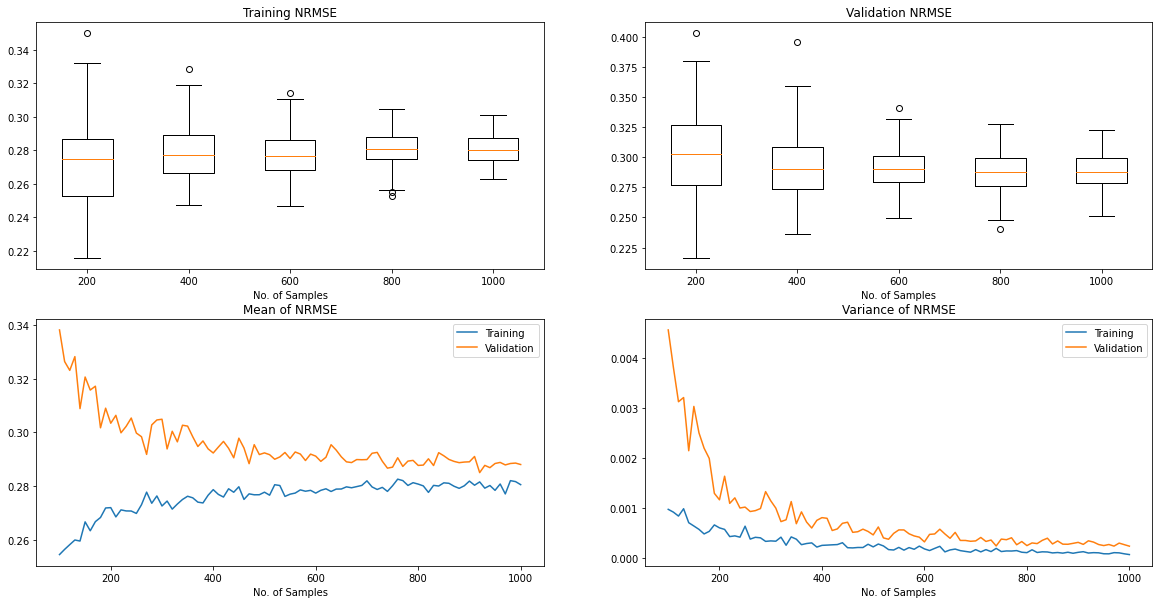

In [ ]:
# defining the range over which to sweep the variable
samples_range = range(100, 1010, 10)
# defining the constants
numFeatures, noise_var, bias, lambda2 = 15, 0.5, 0.3, 0.1
# creating lists to store the results
nrmse_train, nrmse_val = [], []

# generating the weight vector
w_orig = rng.random(size=(numFeatures, 1))

# sweeping the variable
for numSamples in samples_range:
    # creating nested lists to store data in a structured manner
    nrmse_train.append([])
    nrmse_val.append([])
    # doing multiple iterations for a single value of the variable
    for _ in range(100):
        # giving new random seed to the random Generator
        rng = np.random.default_rng()
        # generating random data and target using the same model (weight vector) as earlier
        data = gen_x(numSamples, numFeatures)
        target = gen_t(data, w_orig, bias, noise_var)
        # splitting the data into training and validation in the ratio 70:30
        data_train, data_val = data[:7*numSamples//10], data[7*numSamples//10:]
        target_train, target_val = target[:7*numSamples//10], target[7*numSamples//10:]
        # estimating the weights using pseudo inverse
        w, mse, y = weight_estimate(data_train, target_train, lambda2)
        # calculating and storing the nrmse values for both training and validation data
        nrmse_train[-1].append(np.sqrt(mse) / np.std(target_train))
        nrmse_val[-1].append(np.sqrt(compute_mse(lre(data_val, w), target_val)) / np.std(target_val))
# plotting using the function defined earlier
plot(nrmse_train, nrmse_val, samples_range, "No. of Samples")

The mean value of validation nrmse initially falls as the no. of samples go up, whereas the training nrmse rises but after it stabilizes. The variance however decreases asymptotically to zero.

13 b) Training and validation NRMSE obtained using pseudo inverse with number of variables

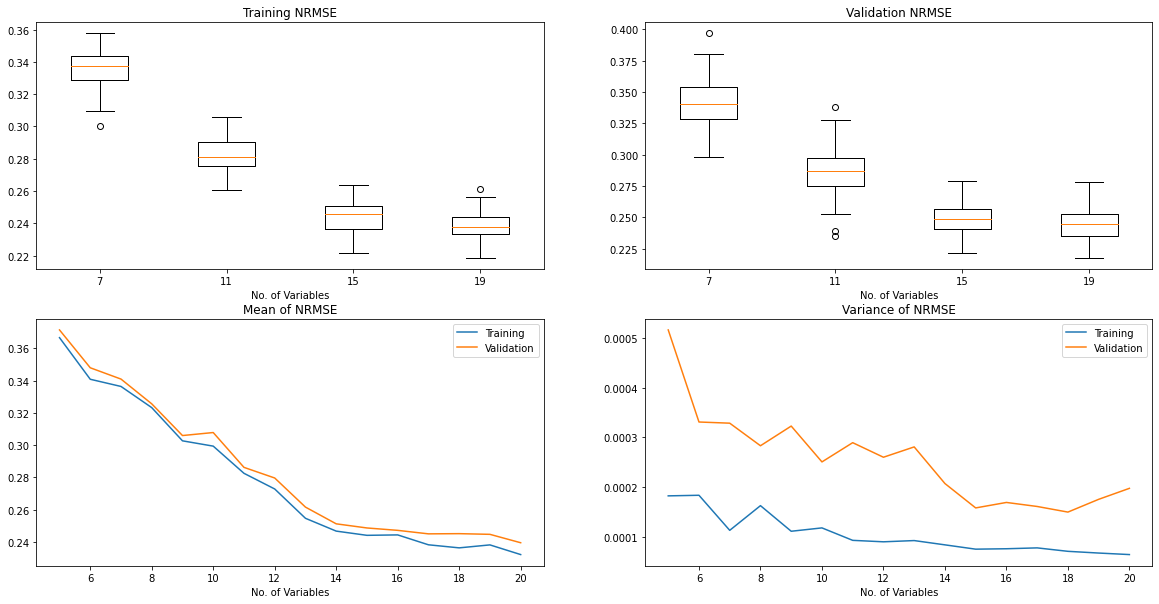

In [ ]:
# same as part a) but with a numFeatures
features_range = range(5, 21)
numSamples, noise_var, bias, lambda2 = 1000, 0.5, 0.5, 0.1
nrmse_train, nrmse_val = [], []

w_orig = rng.random(size=(20, 1))

for numFeatures in features_range:
    nrmse_train.append([])
    nrmse_val.append([])
    for _ in range(100):
        rng = np.random.default_rng()
        data = gen_x(numSamples, numFeatures)
        target = gen_t(data, w_orig[:numFeatures], bias, noise_var)

        data_train, data_val = data[:7*numSamples//10], data[7*numSamples//10:]
        target_train, target_val = target[:7*numSamples//10], target[7*numSamples//10:]
        
        w, mse, y = weight_estimate(data_train, target_train, lambda2)

        nrmse_train[-1].append(np.sqrt(mse) / np.std(target_train))
        nrmse_val[-1].append(np.sqrt(compute_mse(lre(data_val, w), target_val)) / np.std(target_val))

plot(nrmse_train, nrmse_val, features_range, "No. of Variables")

Both mean and variance go down as the number of features/variables increases. This means that the accuracy of our predicion increases as the number of features we have to work with/different dimensions of the data increases.

13 c) Training and validation NRMSE obtained using pseudo inverse with noise variance

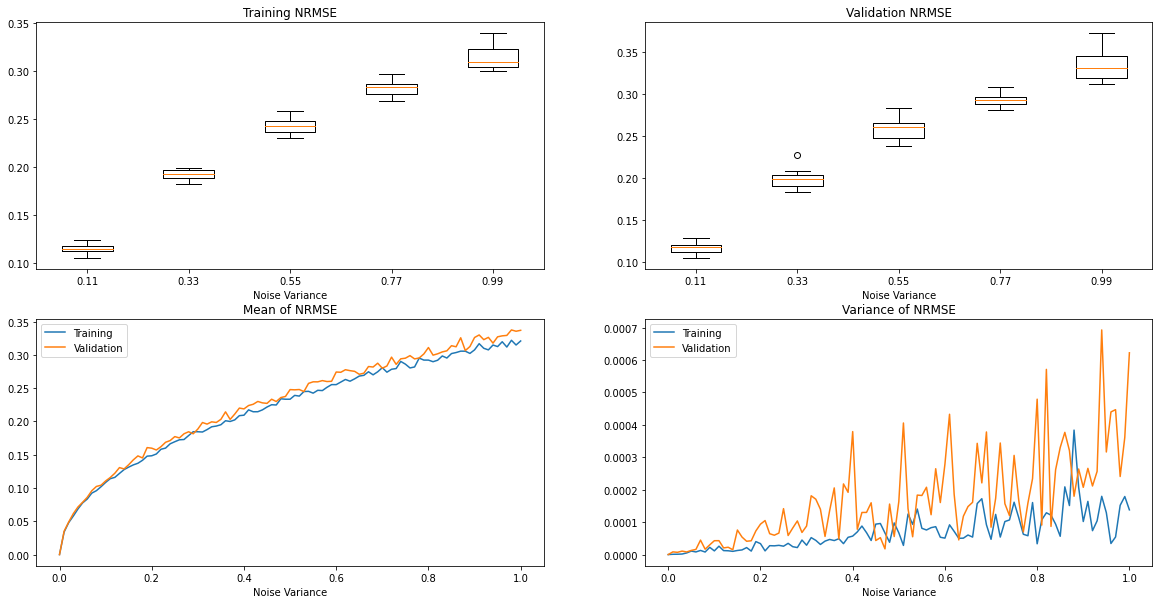

In [ ]:
# same as part a) but with noise_var
noise_var_range = np.linspace(0, 1, 101)
numSamples, numFeatures, bias, lambda2 = 1000, 20, 0.3, 0.1
nrmse_train, nrmse_val = [], []

w_orig = rng.random(size=(numFeatures, 1))

for noise_var in noise_var_range:
    nrmse_train.append([])
    nrmse_val.append([])
    for _ in range(10):
        rng = np.random.default_rng()
        data = gen_x(numSamples, numFeatures)
        target = gen_t(data, w_orig, bias, noise_var)

        data_train, data_val = data[:7*numSamples//10], data[7*numSamples//10:]
        target_train, target_val = target[:7*numSamples//10], target[7*numSamples//10:]

        w, mse, y = weight_estimate(data_train, target_train, lambda2)

        nrmse_train[-1].append(np.sqrt(mse) / np.std(target_train))
        nrmse_val[-1].append(np.sqrt(compute_mse(lre(data_val, w), target_val)) / np.std(target_val))

plot(nrmse_train, nrmse_val, noise_var_range, "Noise Variance")

The mean of nrmse seems to follow the y =  k*sqrt(x) curve. This could be explained by the facts that the rmse is normalized by the standard deviation of the target vector instead of its variance and standard deviation is the square root of variance

13 d) Training and validation NRMSE obtained using pseudo inverse with w0

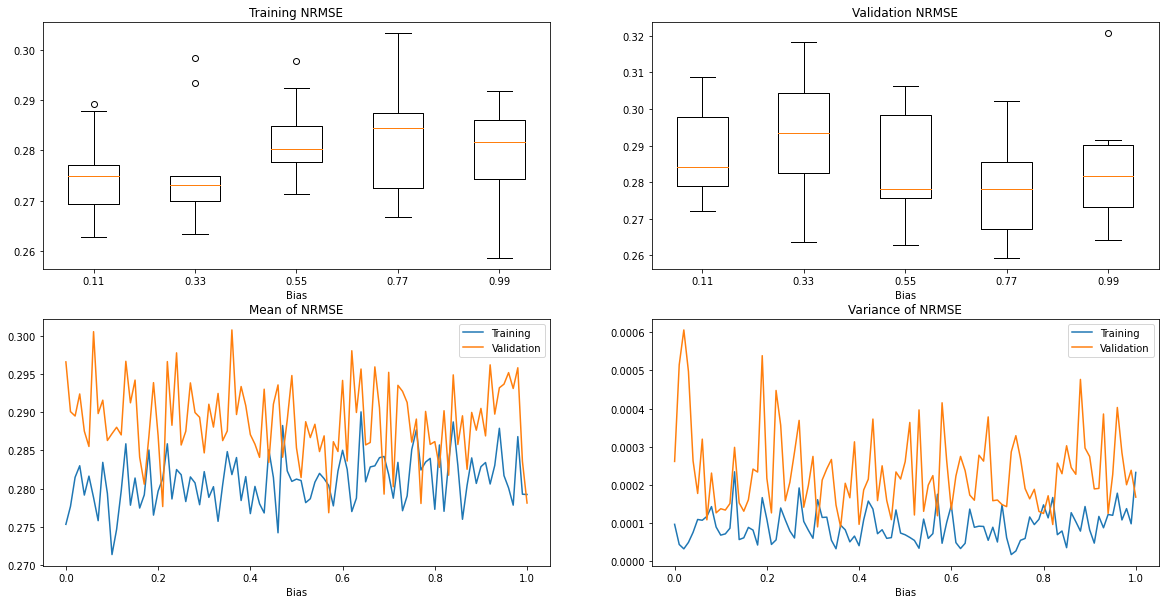

In [ ]:
# same as part a) but with bias w0
bias_range = np.linspace(0, 1, 101)
numSamples, numFeatures, noise_var, lambda2 = 1000, 20, 0.5, 0.1
nrmse_train, nrmse_val = [], []

w_orig = rng.random(size=(numFeatures, 1))

for bias in bias_range:
    nrmse_train.append([])
    nrmse_val.append([])
    for _ in range(10):
        rng = np.random.default_rng()
        data = gen_x(numSamples, numFeatures)
        target = gen_t(data, w_orig, bias, noise_var)

        data_train, data_val = data[:7*numSamples//10], data[7*numSamples//10:]
        target_train, target_val = target[:7*numSamples//10], target[7*numSamples//10:]

        w, mse, y = weight_estimate(data_train, target_train, lambda2)
        
        nrmse_train[-1].append(np.sqrt(mse) / np.std(target_train))
        nrmse_val[-1].append(np.sqrt(compute_mse(lre(data_val, w), target_val)) / np.std(target_val))

plot(nrmse_train, nrmse_val, bias_range, "Bias")

Both mean and variance of nrmse keep on oscillating.

13 e) Training and validation NRMSE obtained using pseudo inverse with lambda2

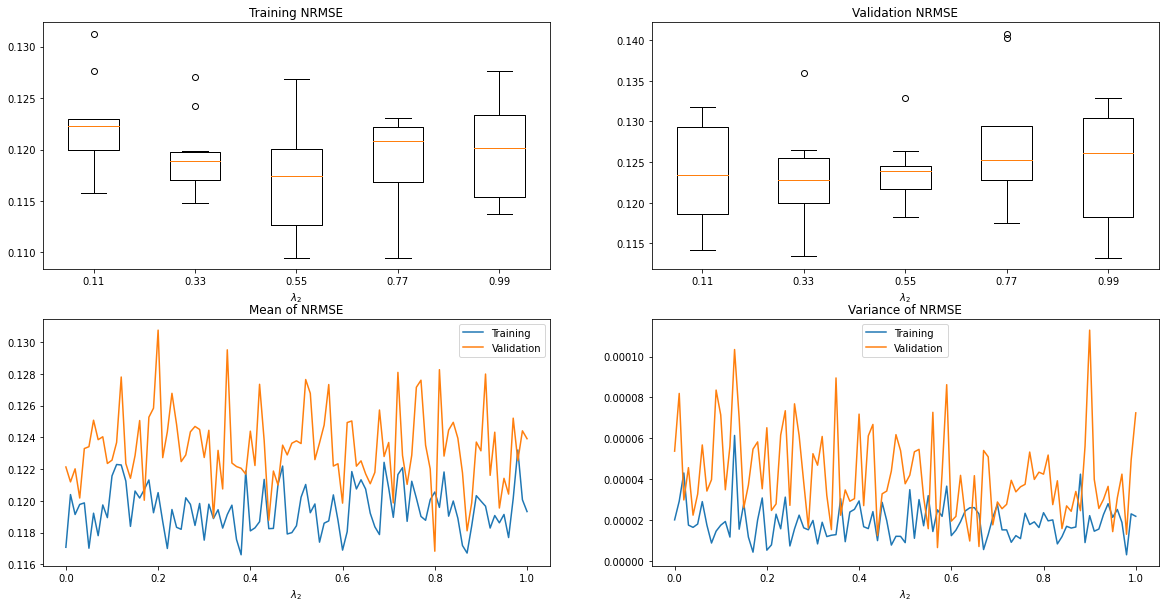

In [ ]:
# same as part a) but with lambda2
lambda2_range = np.linspace(0, 1, 101)
numSamples, numFeatures, noise_var, bias = 1000, 20, 0.1, 0.3
nrmse_train, nrmse_val = [], []

w_orig = rng.random(size=(numFeatures, 1))

for lambda2 in lambda2_range:
    nrmse_train.append([])
    nrmse_val.append([])
    for _ in range(10):
        rng = np.random.default_rng()
        data = gen_x(numSamples, numFeatures)
        target = gen_t(data, w_orig, bias, noise_var)

        data_train, data_val = data[:7*numSamples//10], data[7*numSamples//10:]
        target_train, target_val = target[:7*numSamples//10], target[7*numSamples//10:]

        w, mse, y = weight_estimate(data_train, target_train, lambda2)

        nrmse_train[-1].append(np.sqrt(mse) / np.std(target_train))
        nrmse_val[-1].append(np.sqrt(compute_mse(lre(data_val, w), target_val)) / np.std(target_val))

plot(nrmse_train, nrmse_val, lambda2_range, r"$\lambda_{2}$")

Regularization addresses the issue of the model having too much freedom. It puts constraints on the values of the weights, but it doesn't seem to have much effect on the nrmse values. It could be due to the fact that there is some correlation among the dimensions of the data/weight and so the same results could be achieved with a different set of weights, which is what regularization does (it finds the solution along the contours of the L$_P$ norm).

13 f) Time taken to solve pseudo inverse with number of samples and number of variables and its breaking points

In [ ]:
# defining the constants
bias, noise_var, lambda2 = 0.3, 0.1, 0.1
# array to store the results
results = np.zeros((9, 9))
# loop for increminting numFeatures as powers of 10
for i in range(1, 5):
    numFeatures = 10**i
    # loop for incrementing numSamples as powers of 10
    for j in range(2, 9-i):
        numSamples = 10**j
        # generating a new random seed
        rng = np.random.default_rng()
        # generating a random dataset, weights, and target
        x = gen_x(numSamples, numFeatures)
        w = rng.random(size=(numFeatures, 1))
        t = gen_t(x, w, bias, noise_var)
        # noting the start time
        start = time.time()
        # computing the pseudo inverse
        _ = weight_estimate(x, t, lambda2)
        # noting the end time
        end = time.time()
        # storing the time taken, i.e., end time - start time
        results[i, j] = end - start

If the numSamples were increased further, then due to excess ram usage the colab session would crash and tha variables would be lost upon restarting of the session.

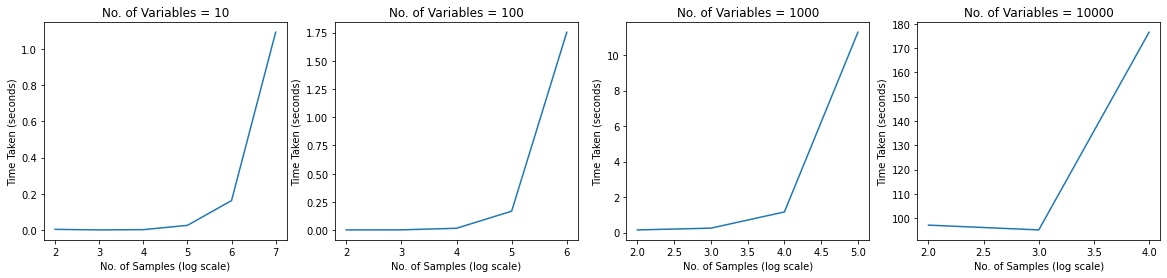

In [ ]:
# plotting the results
fig = plt.figure(figsize=(20, 4))
for i in range(1, 5):
    r = range(2, 9-i)
    ax = fig.add_subplot(1, 4, i)
    ax.plot(r, results[i, r])
    ax.title.set_text(f"No. of Variables = {10**i}")
    ax.xaxis.label.set_text("No. of Samples (log scale)")
    ax.yaxis.label.set_text("Time Taken (seconds)")
fig.show()

Time taken by pseudo inverse is not linear when no. of variables is fixed.

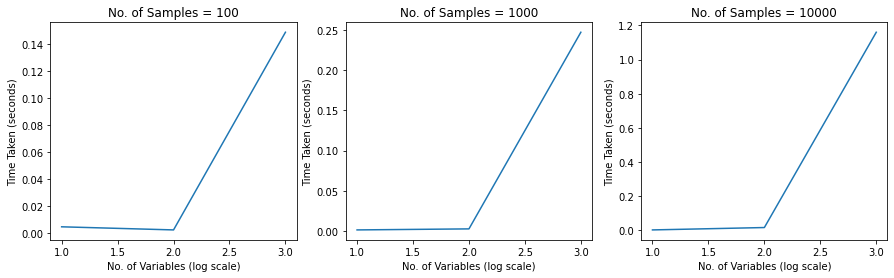

In [ ]:
# plotting the results
rt = np.transpose(results)
fig = plt.figure(figsize=(15, 4))
for i in range(2, 5):
    r = range(1, 4)
    ax = fig.add_subplot(1, 3, i-1)
    ax.plot(r, rt[i, r])
    ax.title.set_text(f"No. of Samples = {10**i}")
    ax.xaxis.label.set_text("No. of Variables (log scale)")
    ax.yaxis.label.set_text("Time Taken (seconds)")
fig.show()

It stll isn't linear when no. of samples is fixed. Note what happens when we add the remaining term on the x-axis.

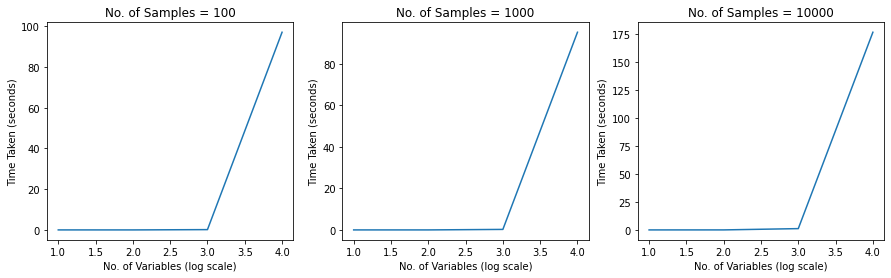

In [ ]:
# plotting the results
fig = plt.figure(figsize=(15, 4))
for i in range(2, 5):
    r = range(1, 5)
    ax = fig.add_subplot(1, 3, i-1)
    ax.plot(r, rt[i, r])
    ax.title.set_text(f"No. of Samples = {10**i}")
    ax.xaxis.label.set_text("No. of Variables (log scale)")
    ax.yaxis.label.set_text("Time Taken (seconds)")
fig.show()

The first three plots looks similar, but in fact they have completely flattened the graph which was upto no. of variables = 10^(3). This tells how big the jump in the time taken is.

13 g) Training and validation NRMSE obtained using gradient descent with max_iter

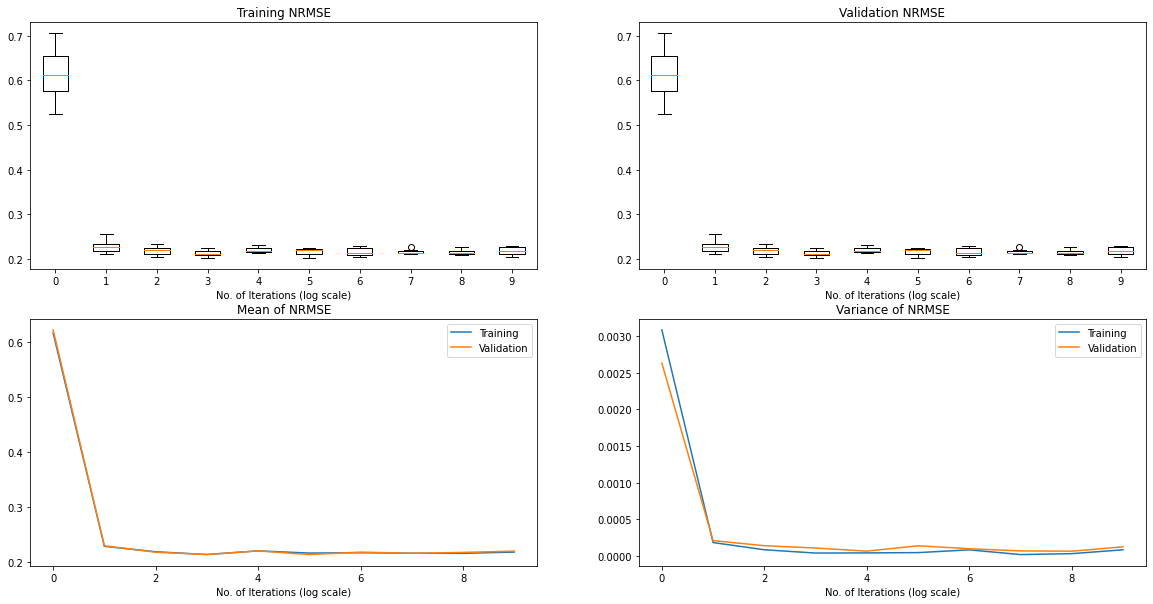

In [ ]:
# same as part a) but with gradient descent and max_iter instead of pseudo inverse and numSamples
max_iter_range = range(10)
numSamples, numFeatures, noise_var, bias, eta, lambda2, lambda1, min_change_NRMSE = 1000, 15, 0.1, 0.3, 0.1, 0.1, 0.1, 0
nrmse_train, nrmse_val = [], []

w_orig = rng.random(size=(numFeatures, 1))

for max_iter in max_iter_range:
    nrmse_train.append([])
    nrmse_val.append([])
    for _ in range(10):
        rng = np.random.default_rng()
        x = gen_x(numSamples, numFeatures)
        t = gen_t(x, w_orig, bias, noise_var)

        x_train, x_val = x[:7*numSamples//10], x[7*numSamples//10:]
        t_train, t_val = t[:7*numSamples//10], t[7*numSamples//10:]

        w, nrmse = gradient_descent(x, t, 10**max_iter, min_change_NRMSE, eta, lambda2, lambda1)

        nrmse_train[-1].append(nrmse)
        nrmse_val[-1].append(np.sqrt(compute_mse(lre(x_val, w), t_val)) / np.std(t_val))

plot(nrmse_train, nrmse_val, max_iter_range, "No. of Iterations (log scale)", box_plot_all=True)

Iterations after 100 hardly bring any improvement hence, hereafter max_iter is taken to be 100. min_change_NRMSE was set to 0 to prevent the gradient descent loop to stop iterating before max_iter was reached.

13 h) Training and validation NRMSE obtained using gradient descent with eta

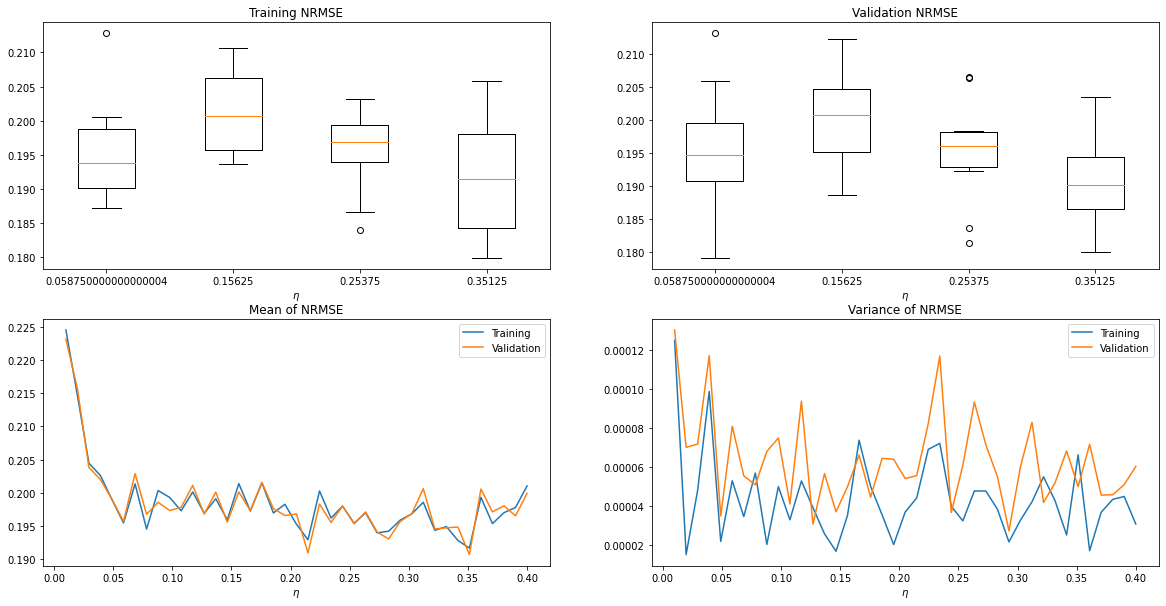

In [ ]:
# same as part g) but with eta
eta_range = np.linspace(0.01, 0.4, 41)
numSamples, numFeatures, noise_var, bias, max_iter, lambda2, lambda1, min_change_NRMSE = 1000, 15, 0.1, 0.3, 100, 0.1, 0.1, 0.001
nrmse_train, nrmse_val = [], []

w_orig = rng.random(size=(numFeatures, 1))

for eta in eta_range:
    nrmse_train.append([])
    nrmse_val.append([])
    for _ in range(10):
        rng = np.random.default_rng()
        x = gen_x(numSamples, numFeatures)
        t = gen_t(x, w_orig, bias, noise_var)

        x_train, x_val = x[:7*numSamples//10], x[7*numSamples//10:]
        t_train, t_val = t[:7*numSamples//10], t[7*numSamples//10:]

        w, nrmse = gradient_descent(x, t, max_iter, min_change_NRMSE, eta, lambda2, lambda1)

        nrmse_train[-1].append(nrmse)
        nrmse_val[-1].append(np.sqrt(compute_mse(lre(x_val, w), t_val)) / np.std(t_val))

plot(nrmse_train, nrmse_val, eta_range, r"$\eta$")

A learning rate of 0.1 is better the that of 0.01. No makor changes to NRMSE by increasing the learning rate in steps of 0.01 and eta >= 1 caused both the weights and NRMSE to increase indefinitely.

13 i) Time taken to solve gradient descent with number of samples and number of variables and its breaking points

In [ ]:
# same as part f) but with gradient descent instead of pseudo inverse
noise_var = eta = lambda2 = lambda1 = 0.1
bias, max_iter, min_change_NRMSE = 0.3, 100, 0.001
gd_results = np.zeros((9, 9))
for i in range(1, 5):
    numFeatures = 10**i
    for j in range(2, 9-i):
        numSamples = 10**j
        rng = np.random.default_rng()
        x = gen_x(numSamples, numFeatures)
        w = rng.random(size=(numFeatures, 1))
        t = gen_t(x, w, bias, noise_var)
        start = time.time()
        _ = gradient_descent(x, t, max_iter, min_change_NRMSE, eta, lambda2, lambda1)
        end = time.time()
        gd_results[i, j] = end - start

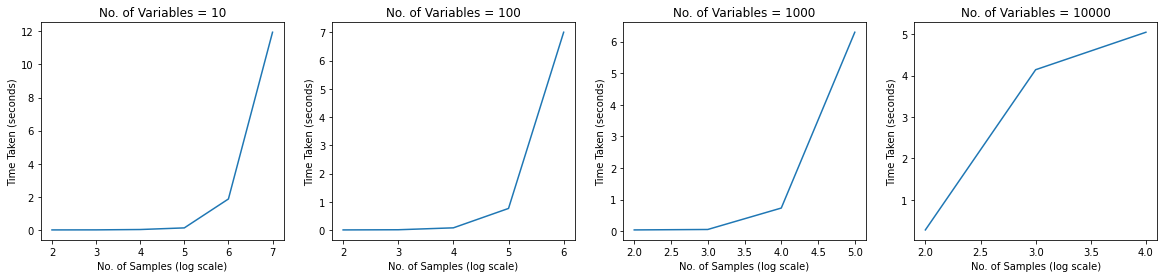

In [ ]:
# plotting the results
fig = plt.figure(figsize=(20, 4))
for i in range(1, 5):
    r = range(2, 9-i)
    ax = fig.add_subplot(1, 4, i)
    ax.plot(r, gd_results[i, r])
    ax.title.set_text(f"No. of Variables = {10**i}")
    ax.xaxis.label.set_text("No. of Samples (log scale)")
    ax.yaxis.label.set_text("Time Taken (seconds)")
fig.show()

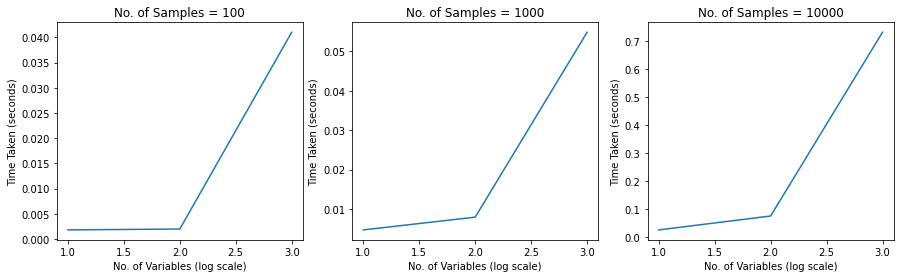

In [ ]:
# plotting the results
gd_rt = np.transpose(gd_results)
fig = plt.figure(figsize=(15, 4))
for i in range(2, 5):
    r = range(1, 4)
    ax = fig.add_subplot(1, 3, i-1)
    ax.plot(r, gd_rt[i, r])
    ax.title.set_text(f"No. of Samples = {10**i}")
    ax.xaxis.label.set_text("No. of Variables (log scale)")
    ax.yaxis.label.set_text("Time Taken (seconds)")
fig.show()

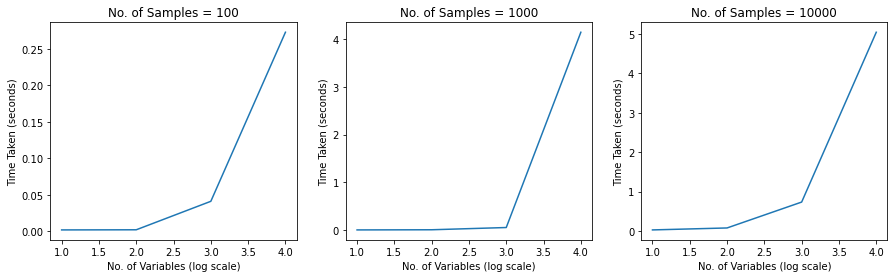

In [ ]:
# plotting the results
fig = plt.figure(figsize=(15, 4))
for i in range(2, 5):
    r = range(1, 5)
    ax = fig.add_subplot(1, 3, i-1)
    ax.plot(r, gd_rt[i, r])
    ax.title.set_text(f"No. of Samples = {10**i}")
    ax.xaxis.label.set_text("No. of Variables (log scale)")
    ax.yaxis.label.set_text("Time Taken (seconds)")
fig.show()

13 j) part to be skipped

13 k) Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda2

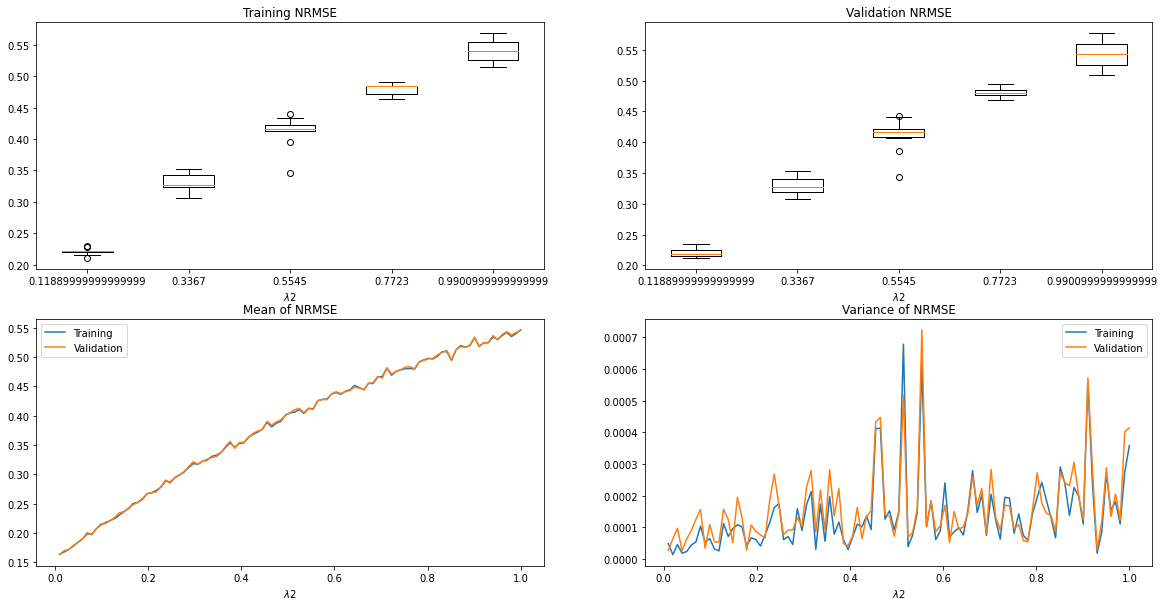

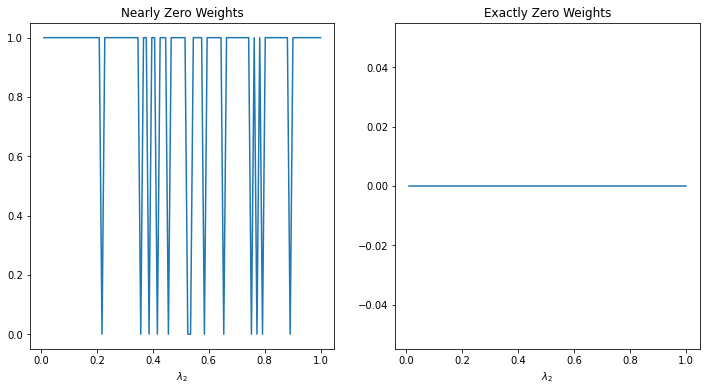

In [ ]:
# same as part g) but with lambda2
lambda2_range = np.linspace(0.01, 1, 101)
numSamples, numFeatures, noise_var, bias, max_iter, eta, lambda1, min_change_NRMSE = 1000, 15, 0.1, 0.3, 100, 0.1, 0.1, 0.001
nrmse_train, nrmse_val = [], []
nzw2, ezw2 = [], []

w_orig = rng.random(size=(numFeatures, 1))

for lambda2 in lambda2_range:
    nrmse_train.append([])
    nrmse_val.append([])
    nzw2.append([])
    ezw2.append([])
    for _ in range(10):
        rng = np.random.default_rng()
        x = gen_x(numSamples, numFeatures)
        t = gen_t(x, w_orig, bias, noise_var)

        x_train, x_val = x[:7*numSamples//10], x[7*numSamples//10:]
        t_train, t_val = t[:7*numSamples//10], t[7*numSamples//10:]

        w, nrmse = gradient_descent(x, t, max_iter, min_change_NRMSE, eta, lambda2, lambda1)

        nrmse_train[-1].append(nrmse)
        nrmse_val[-1].append(np.sqrt(compute_mse(lre(x_val, w), t_val)) / np.std(t_val))
        nzw2[-1].append(nearly_zero_weights(w))
        ezw2[-1].append(exactly_zero_weights(w))

plot(nrmse_train, nrmse_val, lambda2_range, r"$\lambda2$")
# furhtermore visualizing the nearly zero and exactly zero weights
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(1, 2, 1)
ax.plot(lambda2_range, [np.max(i) for i in nzw2])
ax.title.set_text("Nearly Zero Weights")
ax.xaxis.label.set_text(r"$\lambda_2$")

ax = fig.add_subplot(1, 2, 2)
ax.plot(lambda2_range, [np.max(i) for i in ezw2])
ax.title.set_text("Exactly Zero Weights")
ax.xaxis.label.set_text(r"$\lambda_2$")

fig.show()

L2 regularization failed to eliminate even a single weight, but is capable to bring down the value of atmost one weight to nearly zero. Optimal value choosen based on the trade-off between no. of nearly zero weights and mean NRMSE is $\lambda_2$ = 0.2.

13 l) Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda1

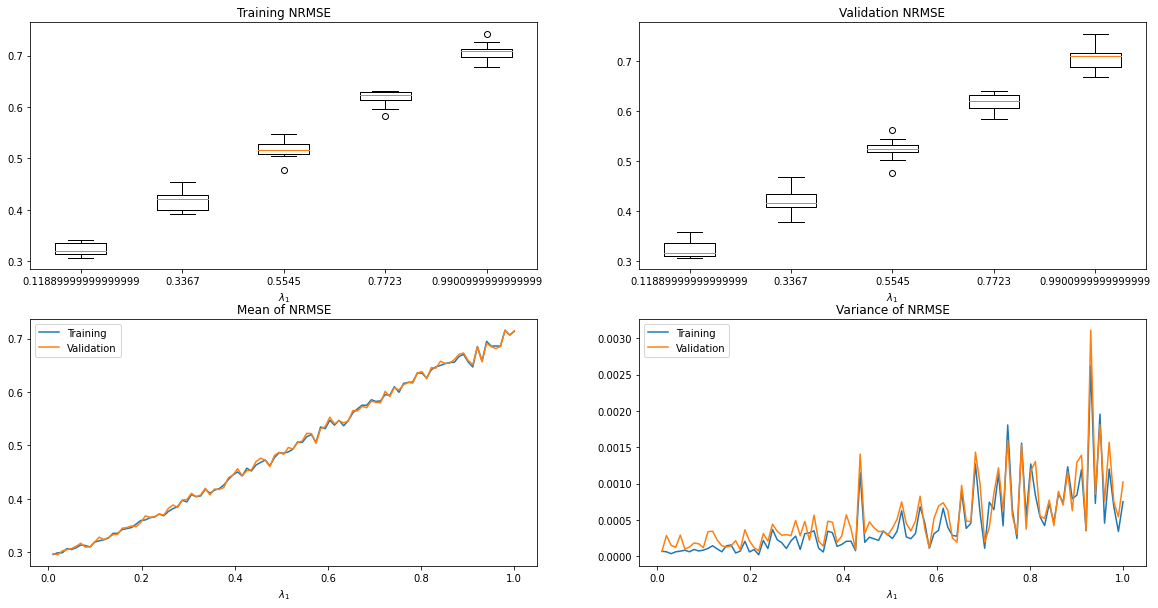

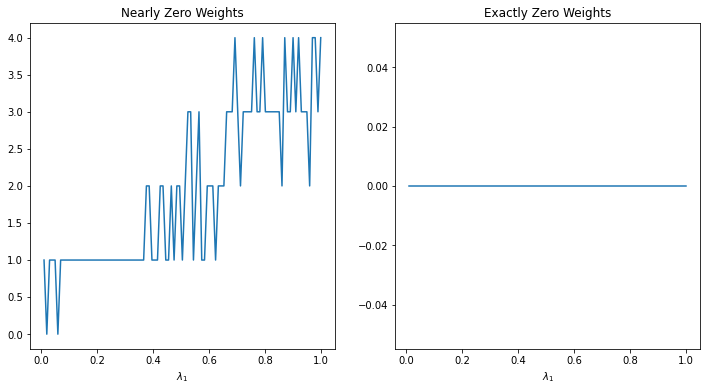

In [ ]:
# same as part k) but with lambda1
lambda1_range = np.linspace(0.01, 1, 101)
numSamples, numFeatures, noise_var, bias, max_iter, eta, lambda2, min_change_NRMSE = 1000, 15, 0.5, 0.3, 100, 0.1, 0.1, 0.001
nrmse_train, nrmse_val = [], []
nzw1, ezw1 = [], []
w_orig = rng.random(size=(numFeatures, 1))

for lambda1 in lambda1_range:
    nrmse_train.append([])
    nrmse_val.append([])
    nzw1.append([])
    ezw1.append([])
    for _ in range(10):
        rng = np.random.default_rng()
        x = gen_x(numSamples, numFeatures)
        t = gen_t(x, w_orig, bias, noise_var)

        x_train, x_val = x[:7*numSamples//10], x[7*numSamples//10:]
        t_train, t_val = t[:7*numSamples//10], t[7*numSamples//10:]

        w, nrmse = gradient_descent(x, t, max_iter, min_change_NRMSE, eta, lambda2, lambda1)

        nrmse_train[-1].append(nrmse)
        nrmse_val[-1].append(np.sqrt(compute_mse(lre(x_val, w), t_val)) / np.std(t_val))
        nzw1[-1].append(nearly_zero_weights(w))
        ezw1[-1].append(exactly_zero_weights(w))

plot(nrmse_train, nrmse_val, lambda1_range, r"$\lambda_1$")

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(1, 2, 1)
ax.plot(lambda1_range, [np.max(i) for i in nzw1])
ax.title.set_text("Nearly Zero Weights")
ax.xaxis.label.set_text(r"$\lambda_1$")

ax = fig.add_subplot(1, 2, 2)
ax.plot(lambda1_range, [np.max(i) for i in ezw1])
ax.title.set_text("Exactly Zero Weights")
ax.xaxis.label.set_text(r"$\lambda_1$")

fig.show()

While L1 regularization also failed to elimnate even a single weight, it could bring 4 weights (out of 15) nearly zero value. Optimal value choosen based on the trade-off between no. of nearly zero weights and mean NRMSE is $\lambda_1$ = 0.4.

13 m) Training and validation NRMSE for optimal lambda2 with noise variance

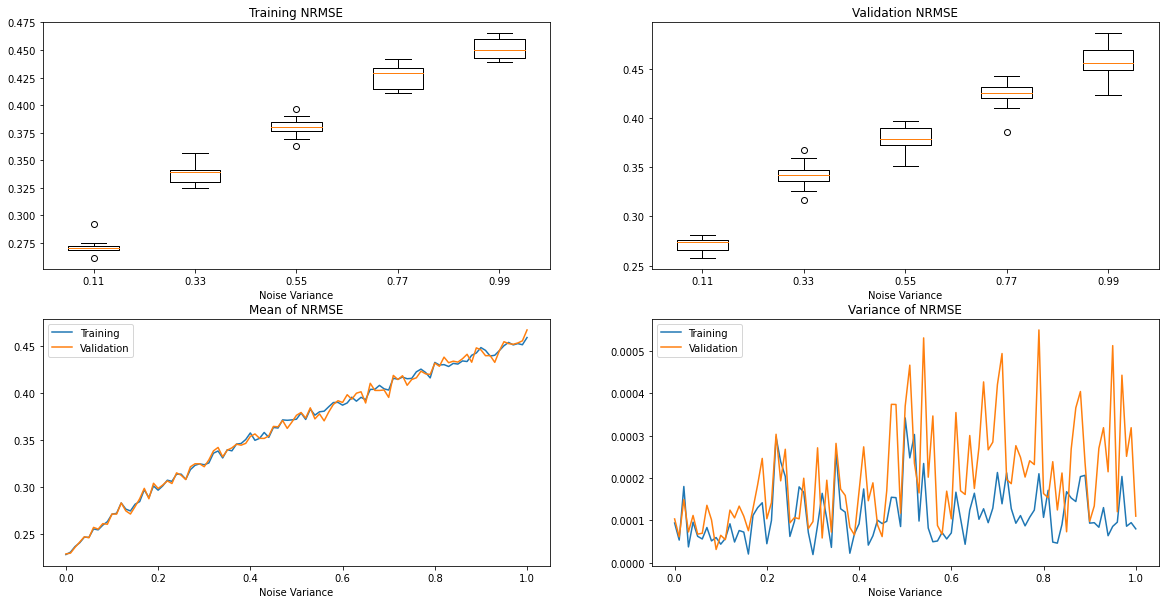

In [ ]:
# same as part g) but with noise_var and lambda2 fixed to the optimal value
noise_var_range = np.linspace(0, 1, 101)
numSamples, numFeatures, bias, max_iter, eta, lambda2, lambda1, min_change_NRMSE = 1000, 15, 0.3, 100, 0.1, 0.2, 0.1, 0.001
nrmse_train, nrmse_val = [], []

w_orig = rng.random(size=(numFeatures, 1))

for noise_var in noise_var_range:
    nrmse_train.append([])
    nrmse_val.append([])
    for _ in range(10):
        rng = np.random.default_rng()
        x = gen_x(numSamples, numFeatures)
        t = gen_t(x, w_orig, bias, noise_var)

        x_train, x_val = x[:7*numSamples//10], x[7*numSamples//10:]
        t_train, t_val = t[:7*numSamples//10], t[7*numSamples//10:]

        w, nrmse = gradient_descent(x, t, max_iter, min_change_NRMSE, eta, lambda2, lambda1)

        nrmse_train[-1].append(nrmse)
        nrmse_val[-1].append(np.sqrt(compute_mse(lre(x_val, w), t_val)) / np.std(t_val))

plot(nrmse_train, nrmse_val, noise_var_range, r"Noise Variance")

NRMSE is increasing with noise variance because as noise in the data increases its deviation from a linear model also increases.

13 n) Training and validation NRMSE for optimal lambda1 with noise variance

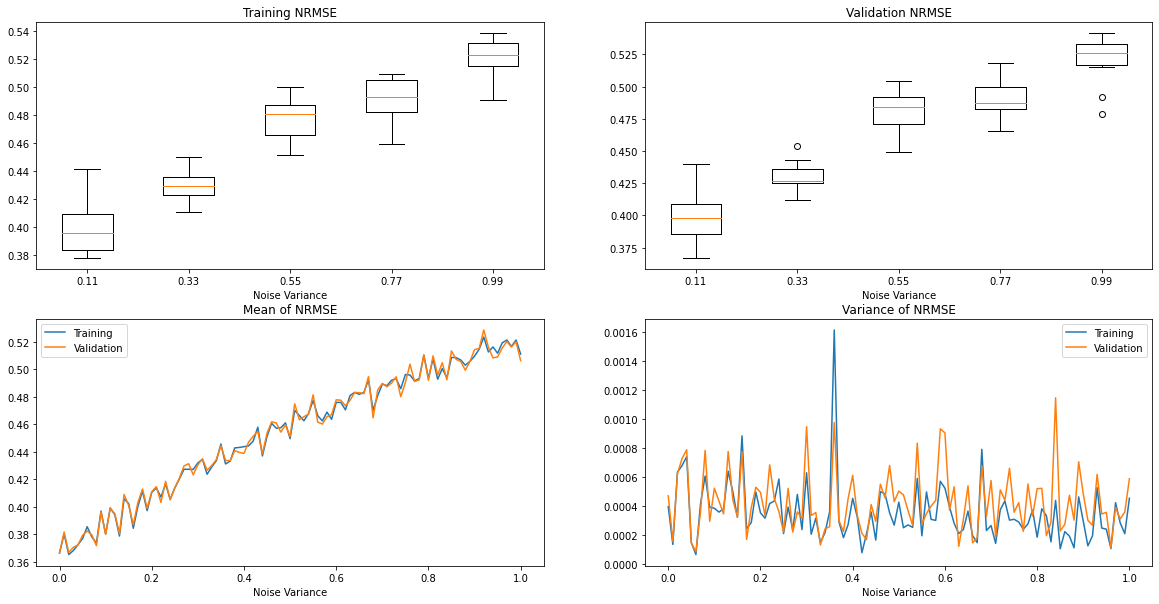

In [ ]:
# same as part m) but with lambda1 fixed to the optimal value
noise_var_range = np.linspace(0, 1, 101)
numSamples, numFeatures, bias, max_iter, eta, lambda2, lambda1, min_change_NRMSE = 1000, 15, 0.3, 100, 0.1, 0.1, 0.4, 0.001
nrmse_train, nrmse_val = [], []

w_orig = rng.random(size=(numFeatures, 1))

for noise_var in noise_var_range:
    nrmse_train.append([])
    nrmse_val.append([])
    for _ in range(10):
        rng = np.random.default_rng()
        x = gen_x(numSamples, numFeatures)
        t = gen_t(x, w_orig, bias, noise_var)

        x_train, x_val = x[:7*numSamples//10], x[7*numSamples//10:]
        t_train, t_val = t[:7*numSamples//10], t[7*numSamples//10:]

        w, nrmse = gradient_descent(x, t, max_iter, min_change_NRMSE, eta, lambda2, lambda1)

        nrmse_train[-1].append(nrmse)
        nrmse_val[-1].append(np.sqrt(compute_mse(lre(x_val, w), t_val)) / np.std(t_val))

plot(nrmse_train, nrmse_val, noise_var_range, r"Noise Variance")

13 o) part to be skipped

14 Overall Learning Points:
- Unit Testing should be done regularly while coding large assignments.
- Functions for operations on matrices should be tested with rectangular matrices as arguments to check for any dimension mismatch.
- It is better to absorb the bias term w0 in the matrices x (dataset) and w (weight vector) to simplify and aid in the understanding of linear regression problem.
- Debugging will be easier if the shapes of the arrays are noted properly after every operation such as taking traspose, concatenating, etc.
- Pseudo inverse gives better approximation of L2 regularization is done (i.e., $\lambda_2 \neq$ 0) compared with when it isn't (i.e., $\lambda_2$ = 0).
- Usually, performing Gradient Descent is faster than taking Pseudo Inverse.
- Gradient Descent starts blowing up (the change in NRMSE is greater than min_change but it is in the positive direction, i.e., the weights and NRMSE keep on increasing with every iteration until max_iter has been reached) weights and NRMSE once learing rate crosses 0.5 (in my testing).

15 References:
- Numpy documentation: regarding methods to generate random values and matrix operations such as taking the inverse. Links: https://numpy.org/doc/stable/reference/random/generator.html, https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html
- Name- Abhijeet Pal, Roll no.- 200100107: Discussed regarding the interpretations and kinds of plots required for question 13.